In [1]:
import pandas as pd
import swifter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
%matplotlib inline
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 500)

# Data Cleaning/Exploration

Steps:
1. Determine Data Types
2. Deal with Missing Values (MAR/MNAR)
    - Continuous
    - Categorical
3. Outliers
    - Visual/Statistical
    - What to do with them? (Drop/winsorize/transform?)

In [2]:
df = pd.read_csv('nba_2012-2018_reg_data.csv')
df.head()

,gameID,seasID,gmDate,gmTime,seasTyp,teamAbbr_A,teamConf_A,teamDiv_A,teamLoc_A,teamRslt_A,teamMin_A,teamDayOff_A,teamPTS_A,teamAST_A,teamTO_A,teamSTL_A,teamBLK_A,teamPF_A,teamFGA_A,teamFGM_A,teamFG%_A,team2PA_A,team2PM_A,team2P%_A,team3PA_A,team3PM_A,team3P%_A,teamFTA_A,teamFTM_A,teamFT%_A,teamORB_A,teamDRB_A,teamTRB_A,teamPTS1_A,teamPTS2_A,teamPTS3_A,teamPTS4_A,teamPTS5_A,teamPTS6_A,teamPTS7_A,teamPTS8_A,teamTREB%_A,teamASST%_A,teamTS%_A,teamEFG%_A,teamOREB%_A,teamDREB%_A,teamTO%_A,teamSTL%_A,teamBLK%_A,teamBLKR_A,teamPPS_A,teamFIC_A,teamFIC40_A,teamOrtg_A,teamDrtg_A,teamEDiff_A,teamPlay%_A,teamAR_A,teamAST/TO_A,teamSTL/TO_A,poss_A,pace_A,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr_B,teamConf_B,teamDiv_B,teamLoc_B,teamRslt_B,teamMin_B,teamDayOff_B,teamPTS_B,teamAST_B,teamTO_B,teamSTL_B,teamBLK_B,teamPF_B,teamFGA_B,teamFGM_B,teamFG%_B,team2PA_B,team2PM_B,team2P%_B,team3PA_B,team3PM_B,team3P%_B,teamFTA_B,teamFTM_B,teamFT%_B,teamORB_B,teamDRB_B,teamTRB_B,teamPTS1_B,teamPTS2_B,teamPTS3_B,teamPTS4_B,teamPTS5_B,teamPTS6_B,teamPTS7_B,teamPTS8_B,teamTREB%_B,teamASST%_B,teamTS%_B,teamEFG%_B,teamOREB%_B,teamDREB%_B,teamTO%_B,teamSTL%_B,teamBLK%_B,teamBLKR_B,teamPPS_B,teamFIC_B,teamFIC40_B,teamOrtg_B,teamDrtg_B,teamEDiff_B,teamPlay%_B,teamAR_B,teamAST/TO_B,teamSTL/TO_B,poss_B,pace_B,rank_A,rankOrd_A,gameWon_A,gameLost_A,stk_A,stkType_A,stkTot_A,gameBack_A,ptsFor_A,ptsAgnst_A,homeWin_A,homeLoss_A,awayWin_A,awayLoss_A,confWin_A,confLoss_A,lastFive_A,lastTen_A,gamePlay_A,ptsScore_A,ptsAllow_A,ptsDiff_A,opptGmPlay_A,opptGmWon_A,opptOpptGmPlay_A,opptOpptGmWon_A,sos_A,rel%Indx_A,mov_A,srs_A,pw%_A,pyth%13.91_A,wpyth13.91_A,lpyth13.91_A,pyth%16.5_A,wpyth16.5_A,lpyth16.5_A,rank_B,rankOrd_B,gameWon_B,gameLost_B,stk_B,stkType_B,stkTot_B,gameBack_B,ptsFor_B,ptsAgnst_B,homeWin_B,homeLoss_B,awayWin_B,awayLoss_B,confWin_B,confLoss_B,lastFive_B,lastTen_B,gamePlay_B,ptsScore_B,ptsAllow_B,ptsDiff_B,opptGmPlay_B,opptGmWon_B,opptOpptGmPlay_B,opptOpptGmWon_B,sos_B,rel%Indx_B,mov_B,srs_B,pw%_B,pyth%13.91_B,wpyth13.91_B,lpyth13.91_B,pyth%16.5_B,wpyth16.5_B,lpyth16.5_B,line_price_A,spread_A,spread_price_A,total_A,total_price_A,line_price_B,spread_B,spread_price_B,total_B,total_price_B
0,10020,2012,2012-11-02,19:30,Regular,ATL,East,Southeast,Home,Loss,240,0,102,23,13,12,4,26,85,40,0.4706,63,33,0.5238,22,7,0.3182,17,15,0.8824,7,29,36,21,23,30,28,0,0,0,0,38.2979,57.5000,0.5515,0.5118,16.6667,55.7692,12.3246,12.3226,4.1075,6.3492,1.2000,73.625,61.3542,104.7423,111.9305,-7.1882,0.4396,17.9016,1.7692,92.3077,97.3819,97.3819,Malloy,Ed,Wright,Sean,Barnaky,Brent,HOU,West,Southwest,Away,Win,240,2,109,22,21,8,2,18,90,38,0.4222,60,30,0.5000,30,8,0.2667,29,25,0.8621,23,35,58,28,25,28,28,0,0,0,0,61.7021,57.8947,0.5304,0.4667,44.2308,83.3333,16.9683,8.2151,2.0538,3.3333,1.2111,81.875,68.2292,111.9305,104.7423,7.1882,0.4318,15.0933,1.0476,38.0952,97.3819,97.3819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1st,1.0,0.0,W1,win,1.0,0.0,105.0,96.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,105.0,96.0,9.0,0.0,0.0,0.0,0.0,0.0000,0.000000,9.00,9.0000,0.7963,0.7767,63.6894,18.3106,0.8144,66.7808,15.2192,-213.5,-5.2,-109.3,203.00,-108.3,181.6,5.2,-108.7,203.00,-109.7
1,10020,2012,2012-11-02,19:30,Regular,HOU,West,Southwest,Away,Win,240,2,109,22,21,8,2,18,90,38,0.4222,60,30,0.5000,30,8,0.2667,29,25,0.8621,23,35,58,28,25,28,28,0,0,0,0,61.7021,57.8947,0.5304,0.4667,44.2308,83.3333,16.9683,8.2151,2.0538,3.3333,1.2111,81.875,68.2292,111.9305,104.7423,7.1882,0.4318,15.0933,1.0476,38.0952,97.3819,97.3819,Malloy,Ed,Wright,Sean,Barnaky,Brent,ATL,East,Southeast,Home,Loss,240,0,102,23,13,12,4,26,85,40,0.4706,63,33,0.5238,22,7,0.3182,17,15,0.8824,7,29,36,21,23,30,28,0,0,0,0,38.2979,57.5000,0.5515,0.5118,16.6667,55.7692,12.3246,12.3226,4.1075,6.3492,1.2000,73.625,61.3542,104.7423,111.9305,-7.1882,0.4396,17.9016,1.7692,92.3077,97.3819,97.3819,1.0,1st,1.0,0.0,W1,win,1.0,0.0,105.0,96.0,0.0

In [3]:
df.tail()

,gameID,seasID,gmDate,gmTime,seasTyp,teamAbbr_A,teamConf_A,teamDiv_A,teamLoc_A,teamRslt_A,teamMin_A,teamDayOff_A,teamPTS_A,teamAST_A,teamTO_A,teamSTL_A,teamBLK_A,teamPF_A,teamFGA_A,teamFGM_A,teamFG%_A,team2PA_A,team2PM_A,team2P%_A,team3PA_A,team3PM_A,team3P%_A,teamFTA_A,teamFTM_A,teamFT%_A,teamORB_A,teamDRB_A,teamTRB_A,teamPTS1_A,teamPTS2_A,teamPTS3_A,teamPTS4_A,teamPTS5_A,teamPTS6_A,teamPTS7_A,teamPTS8_A,teamTREB%_A,teamASST%_A,teamTS%_A,teamEFG%_A,teamOREB%_A,teamDREB%_A,teamTO%_A,teamSTL%_A,teamBLK%_A,teamBLKR_A,teamPPS_A,teamFIC_A,teamFIC40_A,teamOrtg_A,teamDrtg_A,teamEDiff_A,teamPlay%_A,teamAR_A,teamAST/TO_A,teamSTL/TO_A,poss_A,pace_A,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr_B,teamConf_B,teamDiv_B,teamLoc_B,teamRslt_B,teamMin_B,teamDayOff_B,teamPTS_B,teamAST_B,teamTO_B,teamSTL_B,teamBLK_B,teamPF_B,teamFGA_B,teamFGM_B,teamFG%_B,team2PA_B,team2PM_B,team2P%_B,team3PA_B,team3PM_B,team3P%_B,teamFTA_B,teamFTM_B,teamFT%_B,teamORB_B,teamDRB_B,teamTRB_B,teamPTS1_B,teamPTS2_B,teamPTS3_B,teamPTS4_B,teamPTS5_B,teamPTS6_B,teamPTS7_B,teamPTS8_B,teamTREB%_B,teamASST%_B,teamTS%_B,teamEFG%_B,teamOREB%_B,teamDREB%_B,teamTO%_B,teamSTL%_B,teamBLK%_B,teamBLKR_B,teamPPS_B,teamFIC_B,teamFIC40_B,teamOrtg_B,teamDrtg_B,teamEDiff_B,teamPlay%_B,teamAR_B,teamAST/TO_B,teamSTL/TO_B,poss_B,pace_B,rank_A,rankOrd_A,gameWon_A,gameLost_A,stk_A,stkType_A,stkTot_A,gameBack_A,ptsFor_A,ptsAgnst_A,homeWin_A,homeLoss_A,awayWin_A,awayLoss_A,confWin_A,confLoss_A,lastFive_A,lastTen_A,gamePlay_A,ptsScore_A,ptsAllow_A,ptsDiff_A,opptGmPlay_A,opptGmWon_A,opptOpptGmPlay_A,opptOpptGmWon_A,sos_A,rel%Indx_A,mov_A,srs_A,pw%_A,pyth%13.91_A,wpyth13.91_A,lpyth13.91_A,pyth%16.5_A,wpyth16.5_A,lpyth16.5_A,rank_B,rankOrd_B,gameWon_B,gameLost_B,stk_B,stkType_B,stkTot_B,gameBack_B,ptsFor_B,ptsAgnst_B,homeWin_B,homeLoss_B,awayWin_B,awayLoss_B,confWin_B,confLoss_B,lastFive_B,lastTen_B,gamePlay_B,ptsScore_B,ptsAllow_B,ptsDiff_B,opptGmPlay_B,opptGmWon_B,opptOpptGmPlay_B,opptOpptGmWon_B,sos_B,rel%Indx_B,mov_B,srs_B,pw%_B,pyth%13.91_B,wpyth13.91_B,lpyth13.91_B,pyth%16.5_B,wpyth16.5_B,lpyth16.5_B,line_price_A,spread_A,spread_price_A,total_A,total_price_A,line_price_B,spread_B,spread_price_B,total_B,total_price_B
14753,16047,2016,2017-03-31,09:00,Regular,WAS,East,Southeast,Away,Loss,241,1,88,12,15,8,1,23,87,35,0.4023,70,30,0.4286,17,5,0.2941,16,13,0.8125,14,31,45,19,20,22,27,0,0,0,0,51.7241,34.2857,0.4679,0.4310,28.5714,81.5789,13.7564,8.8292,1.1036,1.4286,1.0115,48.500,40.2490,97.1211,104.8467,-7.7256,0.3977,9.9141,0.8000,53.3333,90.6085,90.2325,Goble,John,Lindsay,Mark,Cutler,Kevin,UTA,West,Northwest,Home,Win,240,1,95,20,12,9,7,18,72,33,0.4583,47,23,0.4894,25,10,0.4000,31,19,0.6129,7,35,42,24,18,22,31,0,0,0,0,48.2759,60.6061,0.5546,0.5278,18.4211,71.4286,12.2900,9.9328,7.7255,14.8936,1.3194,77.625,64.6875,104.8467,97.1211,7.7256,0.4286,17.0010,1.6667,75.0000,90.6085,90.6085,3.0,3rd,46.0,29.0,L1,loss,1.0,2.0,8216.0,8042.0,29.0,10.0,17.0,19.0,29.0,18.0,3.0,5.0,75.0,109.5,107.2,2.3,5376.0,2623.0,401052.0,198707.0,0.4904,0.521150,2.3200,1.8296,0.5764,0.5739,47.0598,34.9402,0.5874,48.1668,33.8332,4.0,4th,46.0,29.0,W2,win,2.0,15.0,7542.0,7241.0,25.0,12.0,21.0,17.0,27.0,19.0,4.0,6.0,75.0,100.6,96.5,4.0,5375.0,2638.0,400891.0,199766.0,0.4933,0.523300,4.0133,3.5200,0.6321,0.6380,52.3160,29.6840,0.6620,54.2840,27.7160,124.8,2.75,-109.1,208.4,-109.2,-143.1,-2.75,-107.9,208.4,-107.8
14754,16496,2017,2017-12-04,09:00,Regular,UTA,West,Northwest,Home,Win,241,3,116,29,16,9,3,20,76,43,0.5658,42,27,0.6429,34,16,0.4706,18,14,0.7778,10,42,52,29,35,24,28,0,0,0,0,62.6506,67.4419,0.6911,0.6711,34.4828,77.7778,16.0128,10.2463,3.4154,7.1429,1.5263,108.750,90.2490,132.0634,78.5550,53.5084,0.5244,22.4946,1.8125,56.2500,87.8366,87.4721,Taylor,Ben,Garretson,Ron,Davis,Marc,WAS,East,Southeast,Away,Loss,240,3,69,9,13,8,2,21,80,23,0.2875,60,19,0.3167,20,4,0.2000,23,19,0.8261,12,19,31,15,15,22,17,0,0,0,0,37.3494,39.1304,0.3828,0.3125,22.2222,65.5172,12.6067,9.1078,2.2770,3.3333,0.8625,22.125,18.4375,78.5550,

In [4]:
df.shape

(14758, 211)

First, let's look at what each column means.

## Dataset/Column Definitions:

**Dataset Description**: This dataset contains data pertaining to game level information of regular season games in the NBA from the 2012-2013 season to the 2017-2018 season. It is formatted in such a way that each row is a game with information about the two teams that play. Each game has two entries, one from each team's perspective of the game.

**Column Definitions**:
- gameID: unique identification number for each regular season game from 2012-2013 season to 2017-2018 season (there are exactly two rows for each game from each team's perspective, ultimately we only want one instance of each game, but some alterations to the data must be made first) / also serves as part of primary key for dataset (in conjunction with 'teamAbbr_A')
- seasID: the starting year for the season (e.g. 2013 if the season takes place from 2013-2014) / acts as the differentiator between seasons, since using the year date of a game is not an appropriate separation here
- gmDate: the actual date the game is being played (Year/Month/Day)
- gmTime: the time the game begins on a 24 hour clock (ET)
- seasTyp: this indicates what part of the season it is, in this case they are all 'Regular' and therefore this column should be dropped
- teamAbbr_A: the name of team A (there are 30 of these, indicating 30 teams in the league) / serves as the second part of the primary key (in conjunction with the 'gameID')
- teamConf_A: the conference in which team A plays (either East or West)
- teamDiv_A: the division in which team A plays (there are 3 divisions in each conference, meaning there are 6 total divisions)
- teamLoc_A: the indicator for whether team A is playing 'Home' (in their city) or 'Away' (in team B's city)
- teamRslt_A: the outcome of the game from the perspective of team A (Win or Loss)
- teamMin_A: the accumulated minutes played in the game by the players (mostly 240 as that is how many minutes are played cumulatively by players for a regular 4 quarter game, i.e. 5 players play 4 quarters that are 12 minutes each results in 240 cumulative minutes)
- teamDayOff_A: the number of days without a game since the last game for team A (e.g. if the value is 1, team A played 2 days prior)
- teamPTS_A: the total points team A had in the game
- teamAST_A: the total assists team A had in the game
- teamTO_A: the total turnovers team A had in the game
- teamSTL_A: the total steals team A had in the game
- teamBLK_A: the total blocks team A had in the game
- teamPF_A: the total personal fouls team A had in the game
- teamFGA_A: the total attempted field goals (shots) team A had in the game
- teamFGM_A: the total made field goals (made shots) team A had in the game
- teamFG\%_A: the teamFGM / teamFGA for team A in the game 
- team2PA_A: the 2 point field goal attempts team A had in the game
- team2PM_A: the 2 point field goal makes team A had in the game
- team2P\%_A: the team2PM / team2PA for team A in the game
- team3PA_A: the 3 point field goal attempts team A had in the game
- team3PM_A: the 3 point field goal makes team A had in the game
- team3P\%_A: the team3PM / team3PA for team A in the game
- teamFTA_A: the number of free throw attempts by team A in the game
- teamFTM_A: the number of free throw makes by team A in the game
- teamFT\%_A: the teamFTM / teamFTA for team A in the game
- teamORB_A: the number of offensive rebounds team A had in the game
- teamDRB_A: the number of defensive rebounds team A had in the game
- teamTRB_A: the total number of rebounds team A had in the game
- teamPTS1_A: the total points team A had in the first quarter of the game
- teamPTS2_A: the total points team A had in the second quarter of the game
- teamPTS3_A: the total points team A had in the third quarter of the game
- teamPTS4_A: the total points team A had in the fourth quarter of the game
- teamPTS5_A: the total points team A had in the first overtime if the teams are tied after 4 quarters
- teamPTS6_A: the total points team A had in the second overtime if game is still tied after first overtime
- teamPTS7_A: the total points team A had in the third overtime if game is still tied after second overtime
- teamPTS8_A: the total points team A had in the fourth overtime if game is still tied after third overtime
- teamTREB\%_A: the percent of total rebounds team A had in the game (teamTRB_A / (teamTRB_A + teamTRB_B))
- teamASST\%_A: the percent of assisted field goal makes over all field goal makes for team A (teamAST_A / teamFGM_A)
- teamTS\%_A: the true shooting percentage statistic for team A (teamPTS_A / (2 * (teamFGA_A + (teamFTA_A * 0.44))))
- teamEFG\%_A: the effective field goal percentage statistic for team A (teamFGM_A + (0.5 * team3PM_A) / teamFGA_A)
- teamOREB\%_A: the percent of offensive rebounds team A had in the game (teamORB_A / (teamORB_A + teamORB_B))
- teamDREB\%_A: the percent of defensive rebounds team A had in the game (teamDRB_A / (teamDRB_A + teamDRB_B))
- teamTO\%_A: the turnover percentage for team A (teamTO_A * 100 / (teamFGA_A + 0.44 * teamFTA_A + teamTO_A))
- teamSTL\%_A: the steal percentage for team A (teamSTL_A * 100 / poss_A)
- teamBLK\%_A: the block percentage for team A (teamBLK_A * 100 / poss_A)
- teamBLKR_A: the block rate for team A (teamBLK_A * 100 / team2PA_B)
- teamPPS_A: the points per shot for team A (teamPTS_A / teamFGA_A)
- teamFIC_A: the floor impact counter statistic for team A (teamPTS_A + teamORB_A + 0.75 * teamDRB_A + teamAST_A + teamSTL_A + teamBLK_A – 0.75 * teamFGA_A – 0.375 * teamFTA_A – teamTO_A – 0.5 * teamPF_A)
- teamFIC40_A: the floor impact counter per 40 minutes by team A (((teamPTS_A + teamORB_A + 0.75 * teamDRB_A + teamAST_A + teamSTL_A + teamBLK_A – 0.75 * teamFGA_A – 0.375 * teamFTA_A – teamTO_A – 0.5 * teamPF_A) * 40 * 5) / teamMin_A)
- teamOrtg_A: the offensive rating for team A in the game (teamPTS_A * 100 / poss_A)
- teamDrtg_A: the defensive rating for team A in the game (teamPTS_B * 100 / poss_A)
- teamEDiff_A: the efficiency difference for team A in the game (teamOrtg_A – teamDrtg_A)
- teamPlay\%_A: the play percentage for team A in the game (teamFGM_A / (teamFGA_A – teamORB_A + teamTO_A))
- teamAR_A: the assist rate for team A in the game ((teamAST_A * 100) / (teamFGA_A – 0.44 * teamFTA_A + teamAST_A + teamTO_A)
- teamAST/TO_A: the assist to turnover ratio for team A in the game (teamAST_A / teamTO_A)
- teamSTL/TO_A: the steal to turnover ratio for team A in the game (teamSTL_A / teamTO_A)
- poss_A: the total possessions for team A (teamFGA_A – (teamORB_A / teamORB_A + teamDRB_B) * (teamFGA_A – teamFGM_A) * 1.07 + teamTO_A) + (0.4 * teamFTA_A)
- pace_A: the pace for team A in the game ((poss_A * 48 * 5) / teamMin_A))
- offLNm1: first official/referee last name
- offFNm1: first official/referee first name
- offLNm2: second official/referee last name
- offFNm2: second official/referee first name
- offLNm3: third official/referee last name
- offFNm3: third official/referee first name
- teamAbbr_B: the name of team B (there are 30 of these, indicating 30 teams in the league) / serves as another possible second part of the primary key (in conjunction with the 'gameID')
- teamConf_B: the conference in which team B plays (either East or West)
- teamDiv_B: the division in which team B plays (there are 3 divisions in each conference, meaning there are 6 total divisions)
- teamLoc_B: the indicator for whether team B is playing 'Home' (in their city) or 'Away' (in team A's city)
- teamRslt_B: the outcome of the game from the perspective of team B (Win or Loss)
- teamMin_B: the accumulated minutes played in the game by the players (mostly 240 as that is how many minutes are played cumulatively by players for a regular 4 quarter game, i.e. 5 players play 4 quarters that are 12 minutes each results in 240 cumulative minutes)
- teamDayOff_B: the number of days without a game since the last game for team B (e.g. if the value is 1, team B played 2 days prior)
- teamPTS_B: the total points team B had in the game
- teamAST_B: the total assists team B had in the game
- teamTO_B: the total turnovers team B had in the game
- teamSTL_B: the total steals team B had in the game
- teamBLK_B: the total blocks team B had in the game
- teamPF_B: the total personal fouls team B had in the game
- teamFGA_B: the total attempted field goals (shots) team B had in the game
- teamFGM_B: the total made field goals (made shots) team B had in the game
- teamFG\%_B: the teamFGM / teamFGA for team B in the game 
- team2PA_B: the 2 point field goal attempts team B had in the game
- team2PM_B: the 2 point field goal makes team B had in the game
- team2P\%_B: the team2PM / team2PA for team B in the game
- team3PA_B: the 3 point field goal attempts team B had in the game
- team3PM_B: the 3 point field goal makes team B had in the game
- team3P\%_B: the team3PM / team3PA for team B in the game
- teamFTA_B: the number of free throw attempts by team B in the game
- teamFTM_B: the number of free throw makes by team B in the game
- teamFT\%_B: the teamFTM / teamFTA for team B in the game
- teamORB_B: the number of offensive rebounds team B had in the game
- teamDRB_B: the number of defensive rebounds team B had in the game
- teamTRB_B: the total number of rebounds team B had in the game
- teamPTS1_B: the total points team B had in the first quarter of the game
- teamPTS2_B: the total points team B had in the second quarter of the game
- teamPTS3_B: the total points team B had in the third quarter of the game
- teamPTS4_B: the total points team B had in the fourth quarter of the game
- teamPTS5_B: the total points team B had in the first overtime if the teams are tied after 4 quarters
- teamPTS6_B: the total points team B had in the second overtime if game is still tied after first overtime
- teamPTS7_B: the total points team B had in the third overtime if game is still tied after second overtime
- teamPTS8_B: the total points team B had in the fourth overtime if game is still tied after third overtime
- teamTREB\%_B: the percent of total rebounds team B had in the game (teamTRB_B / (teamTRB_B + teamTRB_A))
- teamASST\%_B: the percent of assisted field goal makes over all field goal makes for team B (teamAST_B / teamFGM_B)
- teamTS\%_B: the true shooting percentage statistic for team B (teamPTS_B / (2 * (teamFGA_B + (teamFTA_B * 0.44))))
- teamEFG\%_B: the effective field goal percentage statistic for team B (teamFGM_B + (0.5 * team3PM_B) / teamFGA_B)
- teamOREB\%_B: the percent of offensive rebounds team B had in the game (teamORB_B / (teamORB_B + teamORB_A))
- teamDREB\%_B: the percent of defensive rebounds team B had in the game (teamDRB_B / (teamDRB_B + teamDRB_A))
- teamTO\%_B: the turnover percentage for team B (teamTO_B * 100 / (teamFGA_B + 0.44 * teamFTA_B + teamTO_B))
- teamSTL\%_B: the steal percentage for team B (teamSTL_B * 100 / poss_B)
- teamBLK\%_B: the block percentage for team B (teamBLK_B * 100 / poss_B)
- teamBLKR_B: the block rate for team B (teamBLK_B * 100 / team2PA_A)
- teamPPS_B: the points per shot for team B (teamPTS_B / teamFGA_B)
- teamFIC_B: the floor impact counter statistic for team B (teamPTS_B + teamORB_B + 0.75 * teamDRB_B + teamAST_B + teamSTL_B + teamBLK_B – 0.75 * teamFGA_B – 0.375 * teamFTA_B – teamTO_B – 0.5 * teamPF_B)
- teamFIC40_B: the floor impact counter per 40 minutes by team B (((teamPTS_B + teamORB_B + 0.75 * teamDRB_B + teamAST_B + teamSTL_B + teamBLK_B – 0.75 * teamFGA_B – 0.375 * teamFTA_B – teamTO_B – 0.5 * teamPF_B) * 40 * 5) / teamMin_B)
- teamOrtg_B: the offensive rating for team B in the game (teamPTS_B * 100 / poss_B)
- teamDrtg_B: the defensive rating for team B in the game (teamPTS_A * 100 / poss_B)
- teamEDiff_B: the efficiency difference for team B in the game (teamOrtg_B – teamDrtg_B)
- teamPlay\%_B: the play percentage for team B in the game (teamFGM_B / (teamFGA_B – teamORB_B + teamTO_B))
- teamAR_B: the assist rate for team B in the game ((teamAST_B * 100) / (teamFGA_B – 0.44 * teamFTA_B + teamAST_B + teamTO_B)
- teamAST/TO_B: the assist to turnover ratio for team B in the game (teamAST_B / teamTO_B)
- teamSTL/TO_B: the steal to turnover ratio for team B in the game (teamSTL_B / teamTO_B)
- poss_B: the total possessions for team B (teamFGA_B – (teamORB_B / teamORB_B + teamDRB_A) * (teamFGA_B – teamFGM_B) * 1.07 + teamTO_B) + (0.4 * teamFTA_B)
- pace_B: the pace for team B in the game ((poss_B * 48 * 5) / teamMin_B)))
- rank_A: comparative rank of team A in conference up to game date
- rankOrd_A: comparative rank of team A in conference up to game date
- gameWon_A: number of games team A won in the season up to game date
- gameLost_A: number of games team A lost in the season up to game date
- stk_A: current streak for team A in string format (e.g. W2 indicates team A won the last 2 games they've played)
- stkType_A: type of current streak for team A (win, loss, or -)
- stkTot_A: number of games in current streak for team A
- gameBack_A: number of games team A is behind first place in conference
- ptsFor_A: total accumulated points by team A up to the date of the game in the season
- ptsAgnst_A: total accumulated points scored against team A up to the date of the game in the season
- homeWin_A: number of home games won up to the point of the game for team A in a season
- homeLoss_A: number of home games lost up to the point of the game for team A in a season
- awayWin_A: number of away games won up to the point of the game for team A in a season
- awayLoss_A: number of away games lost up to the point of the game for team A in a season
- confWin_A: number of games won against teams in same conference up to the point of the game for team A in a season
- confLoss_A: number of games lost against teams in same conference up to the point of the game for team A in a season
- lastFive_A: number of wins in the last five games for team A prior to game
- lastTen_A: number of wins in the last ten games for team A prior to game
- gamePlay_A: number of games played up to the point of the game by team A
- ptsScore_A: average points scored by team A per game of all games in the season up to the point of this game
- ptsAllow_A: average points scored against team A per game of all games in the season up to the point of this game
- ptsDiff_A: points differential for the season up to the point of this game for team A (ptsScore_A - ptsAllow_A)
- opptGmPlay_A: accumulated games played by opponents of team A up to the point of this game in the season
- opptGmWon_A: accumulated games won by opponents of team A up to the point of this game in the season
- opptOpptGmPlay_A: accumulated games played by opponents of opponents of team A up to the point of this game in the season
- opptOpptGmWon_A: accumulated games won by opponents of opponents of team A up to the point of this game in the season
- sos_A: strength of schedule for team A up to the point of this game in the season (((2 * opptGmWon_A / opptGmPlay_A) + (opptOpptGmWon_A / opptOpptGmPlay_A)) / 3
- rel\%Indx_A: relative percent index for team A, measures a team's strength of schedule and how a team does against that schedule, up to the point of this game in the season ((0.25 * gamePlay_A / gameWon_A) + (0.5 * opptGmWon_A / opptGmPlay_A) + (0.25 * opptOpptGmWon_A / opptOpptGmPlay_A))
- mov_A: margin of victory for team A up to the point of this game in the season ((ptsFor_A – ptsAgnst_A) / gamePlay_A)
- srs_A: simple rating system statistic for team A up to the point of this game in the season (mov_A – sos_A)
- pw\%_A: projected winning percentage for team A for the season based on mov_A (((mov_A * 2.7) + 41) / 82)
- pyth\%13.91_A: Pythagorean 13.91 winning percentage for team A for the season based on games up to this game(ptsFor_A ^ 13.91 / (ptsFor_A ^ 13.91 + ptsAgnst_A ^ 13.91))
- wpyth13.91_A: Pythagorean 13.91 expected wins for team A for the season (pyth\%13.91_A * 82)
- lpyth13.91_A: Pythagorean 13.91 expected losses for team A for the season (82 – wpyth13.91_A)
- pyth%16.5_A: Pythagorean 16.5 winning percentage for team A for the season based on games up to this game(ptsFor_A ^ 16.5 / (ptsFor_A ^ 16.5 + ptsAgnst_A ^ 16.5))
- wpyth16.5_A: Pythagorean 16.5 expected wins for team A for the season (pyth\%16.5_A * 82)
- lpyth16.5_A: Pythagorean 16.5 expected losses for team A for the season (82 – wpyth16.5_A)
- rank_B: comparative rank of team B in conference up to game date
- rankOrd_B: comparative rank of team B in conference up to game date
- gameWon_B: number of games team B won in the season up to game date
- gameLost_B: number of games team B lost in the season up to game date
- stk_B: current streak for team B in string format (e.g. W2 indicates team B won the last 2 games they've played)
- stkType_B: type of current streak for team B (win, loss, or -)
- stkTot_B: number of games in current streak for team B
- gameBack_B: number of games team B is behind first place in conference
- ptsFor_B: total accumulated points by team B up to the date of the game in the season
- ptsAgnst_B: total accumulated points scored against team B up to the date of the game in the season
- homeWin_B: number of home games won up to the point of the game for team B in a season
- homeLoss_B: number of home games lost up to the point of the game for team B in a season
- awayWin_B: number of away games won up to the point of the game for team B in a season
- awayLoss_B: number of away games lost up to the point of the game for team B in a season
- confWin_B: number of games won against teams in same conference up to the point of the game for team B in a season
- confLoss_B: number of games lost against teams in same conference up to the point of the game for team B in a season
- lastFive_B: number of wins in the last five games for team B prior to game
- lastTen_B: number of wins in the last ten games for team B prior to game
- gamePlay_B: number of games played up to the point of the game by team B
- ptsScore_B: average points scored by team B per game of all games in the season up to the point of this game
- ptsAllow_B: average points scored against team B per game of all games in the season up to the point of this game
- ptsDiff_B: points differential for the season up to the point of this game for team B (ptsScore_B - ptsAllow_B)
- opptGmPlay_B: accumulated games played by opponents of team B up to the point of this game in the season
- opptGmWon_B: accumulated games won by opponents of team B up to the point of this game in the season
- opptOpptGmPlay_B: accumulated games played by opponents of opponents of team B up to the point of this game in the season
- opptOpptGmWon_B: accumulated games won by opponents of opponents of team B up to the point of this game in the season
- sos_B: strength of schedule for team B up to the point of this game in the season (((2 * opptGmWon_B / opptGmPlay_B) + (opptOpptGmWon_B / opptOpptGmPlay_B)) / 3
- rel\%Indx_B: relative percent index for team B, measures a team's strength of schedule and how a team does against that schedule, up to the point of this game in the season ((0.25 * gamePlay_B / gameWon_B) + (0.5 * opptGmWon_B / opptGmPlay_B) + (0.25 * opptOpptGmWon_B / opptOpptGmPlay_B))
- mov_B: margin of victory for team B up to the point of this game in the season ((ptsFor_B – ptsAgnst_B) / gamePlay_B)
- srs_B: simple rating system statistic for team B up to the point of this game in the season (mov_B – sos_B)
- pw\%_B: projected winning percentage for team B for the season based on mov_B (((mov_B * 2.7) + 41) / 82)
- pyth\%13.91_B: Pythagorean 13.91 winning percentage for team B for the season based on games up to this game(ptsFor_B ^ 13.91 / (ptsFor_B ^ 13.91 + ptsAgnst_B ^ 13.91))
- wpyth13.91_B: Pythagorean 13.91 expected wins for team B for the season (pyth\%13.91_B * 82)
- lpyth13.91_B: Pythagorean 13.91 expected losses for team B for the season (82 – wpyth13.91_B)
- pyth%16.5_B: Pythagorean 16.5 winning percentage for team B for the season based on games up to this game(ptsFor_B ^ 16.5 / (ptsFor_B ^ 16.5 + ptsAgnst_B ^ 16.5))
- wpyth16.5_B: Pythagorean 16.5 expected wins for team B for the season (pyth\%16.5_B * 82)
- lpyth16.5_B: Pythagorean 16.5 expected losses for team B for the season (82 – wpyth16.5_B)
- line_price_A: average betting line price for team A
- spread_A: average betting spread for team A
- spread_price_A: average betting spread price for team A
- total_A: average betting total points for team A
- total_price_A: average betting total points price for team A
- line_price_B: average betting line price for team B
- spread_B: average betting spread for team B
- spread_price_B: average betting spread price for team B
- total_B: average betting total points for team B
- total_price_B: average betting total points price for team B

## Missing Values

In [5]:
def get_null_cols(df, kind='indexes'):
    null_ct = df.isnull().sum()
    null_cols = null_ct[null_ct > 0].index
    if kind == 'indexes':
        return null_cols
    if kind == 'series':
        return null_ct[null_ct > 0]

In [6]:
def view_null_rows(df, index=0, ver='game'):
    null_cols = get_null_cols(df)
    column = null_cols[index]
    temp_df = df[df[column].isna()].copy()
    if ver == 'all':
        return temp_df
    if ver == 'game':
        return temp_df[['gmDate', 'teamAbbr_A', 'teamAbbr_B', column]]
    if ver == 'col':
        return temp_df[[column]]

In [7]:
view_null_rows(df, 0, 'game').join(view_null_rows(df, 1, 'col'))

,gmDate,teamAbbr_A,teamAbbr_B,offLNm3,offFNm3
2736,2017-12-28,BOS,HOU,NaN,NaN
2737,2017-12-28,HOU,BOS,NaN,NaN
3204,2015-03-08,CHA,DET,NaN,NaN
3205,2015-03-08,DET,CHA,NaN,NaN


- Gediminas Petraitis was the third official for the BOS/HOU game (indexes 2736 and 2737)
- There was no third official for the CHA/DET game (indexes 3204 and 3205)

In [8]:
df.loc[2736:2737, 'offLNm3'] = 'Petraitis'
df.loc[2736:2737, 'offFNm3'] = 'Gediminas'

In [9]:
df.loc[3204:3205, 'offLNm3'] = 'None'
df.loc[3204:3205, 'offFNm3'] = 'None'

In [10]:
get_null_cols(df)

Index(['rank_A', 'rankOrd_A', 'gameWon_A', 'gameLost_A', 'stk_A', 'stkType_A',
       'stkTot_A', 'gameBack_A', 'ptsFor_A', 'ptsAgnst_A', 'homeWin_A',
       'homeLoss_A', 'awayWin_A', 'awayLoss_A', 'confWin_A', 'confLoss_A',
       'lastFive_A', 'lastTen_A', 'gamePlay_A', 'ptsScore_A', 'ptsAllow_A',
       'ptsDiff_A', 'opptGmPlay_A', 'opptGmWon_A', 'opptOpptGmPlay_A',
       'opptOpptGmWon_A', 'sos_A', 'rel%Indx_A', 'mov_A', 'srs_A', 'pw%_A',
       'pyth%13.91_A', 'wpyth13.91_A', 'lpyth13.91_A', 'pyth%16.5_A',
       'wpyth16.5_A', 'lpyth16.5_A', 'rank_B', 'rankOrd_B', 'gameWon_B',
       'gameLost_B', 'stk_B', 'stkType_B', 'stkTot_B', 'gameBack_B',
       'ptsFor_B', 'ptsAgnst_B', 'homeWin_B', 'homeLoss_B', 'awayWin_B',
       'awayLoss_B', 'confWin_B', 'confLoss_B', 'lastFive_B', 'lastTen_B',
       'gamePlay_B', 'ptsScore_B', 'ptsAllow_B', 'ptsDiff_B', 'opptGmPlay_B',
       'opptGmWon_B', 'opptOpptGmPlay_B', 'opptOpptGmWon_B', 'sos_B',
       'rel%Indx_B', 'mov_B', 'srs_B', 'pw%

Lots of the above columns with nulls occur on rows that are first game occurrences.

Create a new variable, `first_game` to easily filter the dataframe:
- Create list `first_ids` with gameIDs for each team's first game from each season
- Create new variable called `first_game` and if the row's gameID is in `first_ids` then assign with True

In [11]:
first_ids = []
for team in df.teamAbbr_A.unique():
    for season in df[df.teamAbbr_A == team].seasID.unique():
        first_id = df[(df.teamAbbr_A == team) & (df.seasID == season)].sort_values('gmDate').iloc[0, 0]
        first_ids.append(first_id)

In [12]:
df['first_game'] = df.gameID.apply(lambda x: x in first_ids).copy()

Here are the percentages of the missing values out of the total values for our ultimate dataset, looks like the highest missing amount is from the line prices at 2%, which really isn't very much at all considering this dataset contains around 14,500 rows. It may make the most sense to interpolate the data here as it is of the time series variety. However, these values are very dependent on teams and their opponents. Many of these can likely be 'filled in' based off of the data found in the prior game.

### Interpolation and other null filling techniques

Due to the relative completeness of the dataset and the time series like form of the data, it is likely best to interpolate missing numerical values here.

In [13]:
a_cols = df.columns[0:5].tolist() + df.columns[df.columns.str.endswith('_A')].tolist() + df.columns[63:69].tolist() + ['first_game']
b_cols = df.columns[0:5].tolist() + df.columns[df.columns.str.endswith('_B')].tolist() + df.columns[63:69].tolist() + ['first_game']

In [14]:
def interpolate_by_team_by_seas(df, teamAbbr):
    interp_dfs = []
    
    for team in df[teamAbbr].unique():
        for season in df[df[teamAbbr] == team].seasID.unique():
            interp_df = df[(df[teamAbbr] == team) & (df.seasID == season)].sort_values('gmDate').copy().interpolate(limit_direction='both')
            interp_dfs.append(interp_df)
    
    return pd.concat(interp_dfs)

In [15]:
interp_A = interpolate_by_team_by_seas(df[a_cols], 'teamAbbr_A')
interp_B = interpolate_by_team_by_seas(df[b_cols], 'teamAbbr_B')

In [16]:
interp_A.shape, interp_B.shape

((14758, 112), (14758, 112))

In [17]:
get_null_cols(interp_A, kind='series')

rankOrd_A    236
stk_A        236
stkType_A    236
dtype: int64

In [18]:
get_null_cols(interp_B, kind='series')

rankOrd_B    236
stk_B        236
stkType_B    236
dtype: int64

Still a little bit more to be filled as these columns are determined by the values of other columns and they are categorical rather than continuous, it shouldn't be too difficult.

In [19]:
interp_A.rank_A = interp_A.rank_A.astype(int).copy()
interp_B.rank_B = interp_B.rank_B.astype(int).copy()

In [20]:
def assign_ordinal(x):
    if x == 1:
        return '1st'
    if x == 2:
        return '2nd'
    if x == 3:
        return '3rd'
    if x == 4:
        return '4th'
    if x == 5:
        return '5th'
    if x == 6:
        return '6th'
    if x == 7:
        return '7th'
    if x == 8:
        return '8th'
    if x == 9:
        return '9th'
    if x == 10:
        return '10th'
    if x == 11:
        return '11th'
    if x == 12:
        return '12th'
    if x == 13:
        return '13th'
    if x == 14:
        return '14th'
    if x == 15:
        return '15th'

In [21]:
interp_A.rankOrd_A = interp_A.rank_A.apply(assign_ordinal).copy()
interp_B.rankOrd_B = interp_B.rank_B.apply(assign_ordinal).copy()

That takes care of rankOrd_A/B...

In [22]:
interp_A.stkTot_A = interp_A.stkTot_A.astype('int').copy()
interp_B.stkTot_B = interp_B.stkTot_B.astype('int').copy()

In [23]:
temp_df = interp_A[(interp_A['teamAbbr_A'] == 'LAL') & (interp_A.seasID == 2012)].copy()

In [24]:
def fix_stkType(df, teamAbbr, stkType, teamRslt):
    stkType_fix_dfs = []
    
    for team in df[teamAbbr].unique():
        for season in df[df[teamAbbr] == team].seasID.unique():
            temp_df = df[(df[teamAbbr] == team) & (df.seasID == season)].sort_values('gmDate').copy()
            temp_df[stkType] = temp_df[teamRslt].str.lower().shift().copy()
            temp_df[stkType] = temp_df[stkType].fillna('none')
            stkType_fix_dfs.append(temp_df)
    
    return pd.concat(stkType_fix_dfs)

In [25]:
interp_A = fix_stkType(interp_A, 'teamAbbr_A', 'stkType_A', 'teamRslt_A').copy()
interp_B = fix_stkType(interp_B, 'teamAbbr_B', 'stkType_B', 'teamRslt_B').copy()

All that is left is to fix the `stk_A` values and `stk_B` values, then merge the two back together.

In [26]:
interp_A.stk_A = (interp_A.stkType_A.apply(lambda x: 'L' if x == 'loss' else ('W' if x == 'win' else np.nan)) + interp_A.stkTot_A.astype('str')).fillna('none').copy()
interp_B.stk_B = (interp_B.stkType_B.apply(lambda x: 'L' if x == 'loss' else ('W' if x == 'win' else np.nan)) + interp_B.stkTot_B.astype('str')).fillna('none').copy()

In [27]:
interp_A.isna().sum().sum(), interp_B.isna().sum().sum()

(0, 0)

In [28]:
get_null_cols(interp_A), get_null_cols(interp_B)

(Index([], dtype='object'), Index([], dtype='object'))

All nulls have been taken care of!

In [29]:
filled_df = pd.merge(interp_A, interp_B, left_index=True, right_index=True, on=['gameID',
                                                                                'seasID',
                                                                                'gmDate',
                                                                                'gmTime',
                                                                                'seasTyp',
                                                                                'offLNm1',
                                                                                'offFNm1',
                                                                                'offLNm2',
                                                                                'offFNm2',
                                                                                'offLNm3',
                                                                                'offFNm3',
                                                                                'first_game']).sort_index().copy()

## Eliminating Redundant/Unnecessary Columns and Column Organization

Before diving into dealing with any outliers that may exist, any redundant or invariable columns can be removed.

In [30]:
filled_df.columns

Index(['gameID', 'seasID', 'gmDate', 'gmTime', 'seasTyp', 'teamAbbr_A',
       'teamConf_A', 'teamDiv_A', 'teamLoc_A', 'teamRslt_A',
       ...
       'wpyth13.91_B', 'lpyth13.91_B', 'pyth%16.5_B', 'wpyth16.5_B',
       'lpyth16.5_B', 'line_price_B', 'spread_B', 'spread_price_B', 'total_B',
       'total_price_B'],
      dtype='object', length=212)

In [31]:
filled_df = filled_df.drop(columns='seasTyp').copy()

In [32]:
filled_df.columns[0:4].tolist()

['gameID', 'seasID', 'gmDate', 'gmTime']

In [33]:
only_A_cols = filled_df.columns[filled_df.columns.str.endswith('_A')].tolist()
only_B_cols = filled_df.columns[filled_df.columns.str.endswith('_B')].tolist()

Check to see if any series contain the same data...

In [34]:
for x, y in zip(only_A_cols, only_B_cols):
    if (filled_df[x] == filled_df[y]).sum() >= len(filled_df[x] == filled_df[y]):
        print(x, y)

poss_A poss_B


The columns `poss_A` and `poss_B` appear to be exactly the same, we can create one column `poss` and drop the other two.

In [35]:
filled_df['poss'] = filled_df.poss_A.copy()
filled_df = filled_df.drop(columns=['poss_A', 'poss_B']).copy()

Let's change some columns to boolean values instead of strings, there are many columns where this is advantageous.

In [36]:
filled_df.nunique()[filled_df.nunique() == 2].index.tolist()

['teamConf_A',
 'teamLoc_A',
 'teamRslt_A',
 'first_game',
 'teamConf_B',
 'teamLoc_B',
 'teamRslt_B']

In [37]:
filled_df['teamConf_W_A'] = (filled_df.teamConf_A == 'West').copy()
filled_df['teamConf_W_B'] = (filled_df.teamConf_B == 'West').copy()
filled_df['teamHome_A'] = (filled_df.teamLoc_A == 'Home').copy()
filled_df['teamHome_B'] = (filled_df.teamLoc_B == 'Home').copy()
filled_df['teamWin_A'] = (filled_df.teamRslt_A == 'Win').copy()
filled_df['teamWin_B'] = (filled_df.teamRslt_B == 'Win').copy()

In [38]:
filled_df = filled_df.drop(columns=['teamConf_A',
                                     'teamLoc_A',
                                     'teamRslt_A',
                                     'teamConf_B',
                                     'teamLoc_B',
                                     'teamRslt_B']).copy()

In [39]:
filled_df.teamDiv_A = filled_df.teamDiv_A.astype('category').copy()
filled_df.teamDiv_B = filled_df.teamDiv_B.astype('category').copy()
filled_df['teamNm_A'] = filled_df.teamAbbr_A.astype('category').copy()
filled_df['teamNm_B'] = filled_df.teamAbbr_B.astype('category').copy()

In [40]:
filled_df = filled_df.drop(columns=['teamAbbr_A', 'teamAbbr_B']).copy()

Let's get the data (almost) to the final step (mostly in order to explore it from both teams' points of view without double counting everything). Later on, the dataframe `filled_df` will be important in setting up the sliding window of averages for this data.

In [41]:
rand_df = filled_df.sample(frac = 1.0).groupby('gameID').head(1).copy()

In [42]:
a_cols = rand_df.columns[~rand_df.columns.str.endswith('_B')].tolist()

In [43]:
b_cols = []
for item in a_cols:
    b_col = item.replace('_A', '_B')
    b_cols.append(b_col)

In [44]:
for item in b_cols:
    item.replace('_A', '_B')

In [45]:
rand_df_A = rand_df[a_cols].copy()
rand_df_B = rand_df[b_cols].copy()

In [46]:
rand_df_A.columns = rand_df_A.columns.str.replace('_A', '')
rand_df_B.columns = rand_df_B.columns.str.replace('_B', '')

In [47]:
ind_team_df = pd.concat([rand_df_A, rand_df_B]).copy()

For organizational purposes, let's look at each general kind of variable in groups. Let's reorder the columns and group them by type of data.

In [48]:
target_col = ['teamWin']
game_ind_cols = ['gameID', 'seasID', 'gmDate', 'gmTime', 'teamNm', 'teamConf_W', 'teamDiv', 'first_game', 'teamDayOff', 'teamHome'] + ind_team_df.columns[99:105].tolist()
game_stat_cols = ['teamMin'] + ind_team_df.columns[7:57].tolist() + ['poss']
agg_stat_cols = ind_team_df.columns[57:94].tolist()
bet_avg_cols = ind_team_df.columns[94: 99].tolist()

In [49]:
all_cols = target_col + game_ind_cols + game_stat_cols + agg_stat_cols + bet_avg_cols

In [50]:
team_df = ind_team_df[all_cols].copy()
team_df.teamWin = team_df.teamWin.astype('int').copy()
team_df.teamConf_W = team_df.teamConf_W.astype('int').copy()
team_df.first_game = team_df.first_game.astype('int').copy()
team_df.teamHome = team_df.teamHome.astype('int').copy()
team_df.teamMin = pd.cut(team_df.teamMin, bins=[0,250,280,300,330,350], labels=[240, 265, 290, 315, 340]).astype('int')

In [51]:
def box_hist(df, column_idx, size='normal'):
    column = df.columns[column_idx]
    
    if size == 'normal':
        figsize = (12, 5)
    elif size == 'big':
        figsize = (20, 8)
    
    if is_numeric_dtype(df[column]) == True:
        kind = 'numeric'
    else:
        kind = 'non numeric'
        
    if kind == 'numeric':
        plt.figure(figsize=figsize)
        
        plt.subplot(121)
        plt.hist(df[column])
        plt.title(f'{column} distribution')

        plt.subplot(122)
        plt.boxplot(df[column])
        plt.title(f'{column} boxplot')
        
        plt.show()
    
    elif (kind == 'non numeric') and (len(df[column].unique()) < 50):
        f, axes = plt.subplots(1, 2, figsize=figsize)
        
        sns.countplot(df[column], ax=axes[0])
        plt.title(f'{column} counts')
        
        sns.pointplot(data=df,  x=column, y='teamWin' , dodge=True, join=False, ax=axes[1])
        plt.title(f'{column} w.r.t. teamWin')
        
        plt.show()
    
    else:
        print('')
        print(f'{column} is full of strings and there are a lot of \'em!')
        print('')

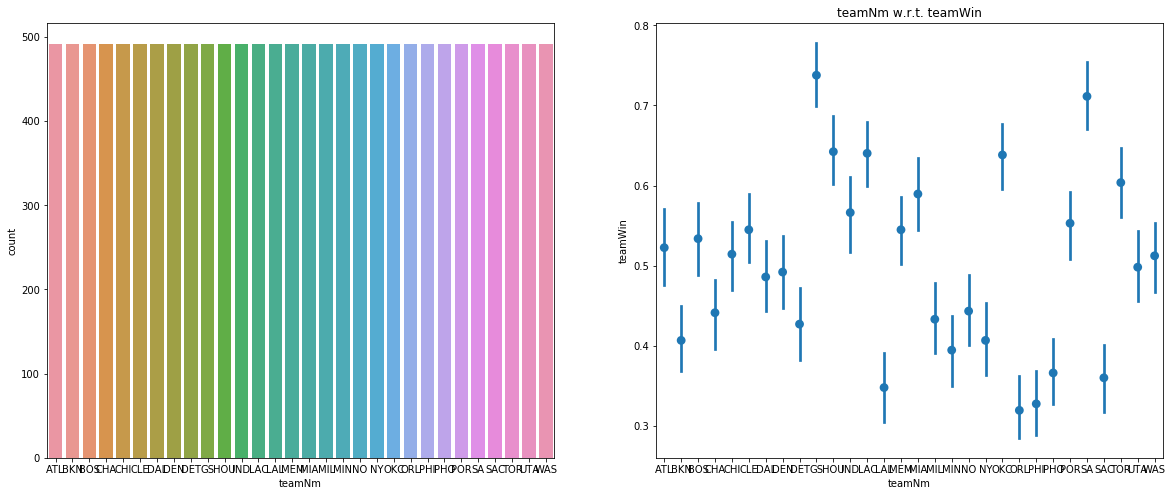

In [52]:
box_hist(team_df, 5, size='big')

Some teams have had much better win percentages over the past 6 years than others, as can be seen here.

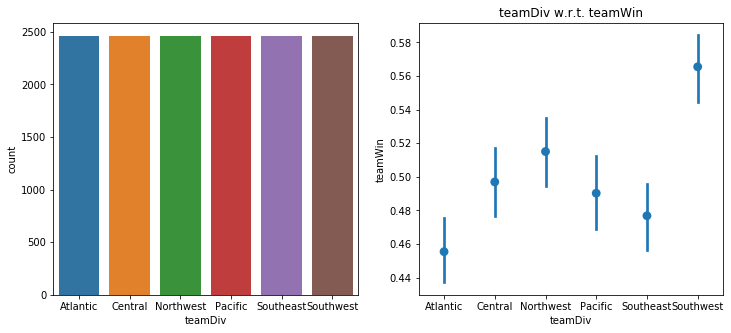

In [53]:
box_hist(team_df, 7)

Similarly, particular divisions have had more success than others over the recent years.

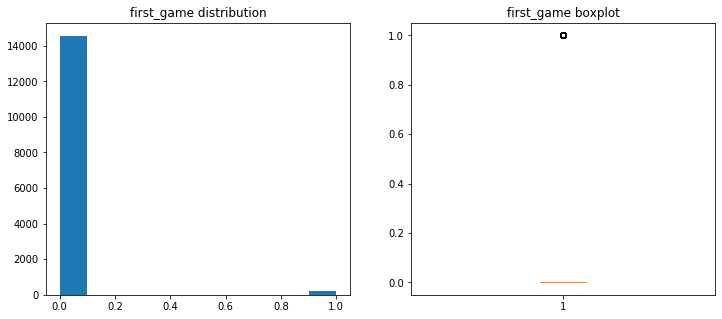

In [54]:
box_hist(team_df, 8)

Very small number of first games, ultimately these will be eliminated when we finally select features, as many of the stat variables will be on rolling windows of averages (making the first game unusable).

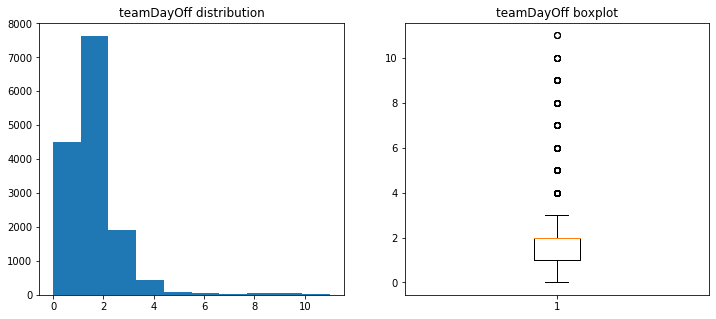

In [55]:
box_hist(team_df, 9)

This is really categorical data, we can change the outliers here to 3+ days and include 3 day data as well (or 4+).

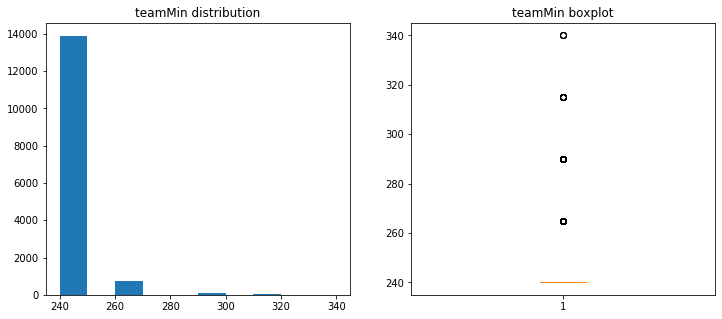

In [56]:
box_hist(team_df, 17)

All the minutes played here shold be 240 plus. These are really categories for whether a game went through regulation, or had to go into overtime periods (1 through 4).

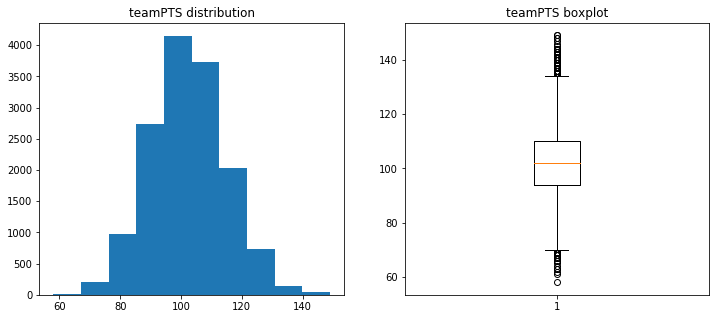

In [57]:
box_hist(team_df, 18)

This looks like a relatively normal distribution, which is fantastic! There may be some outliers now, but after creating the moving window, those will likely get smoothed out (as well as with the rest of the statistical data).

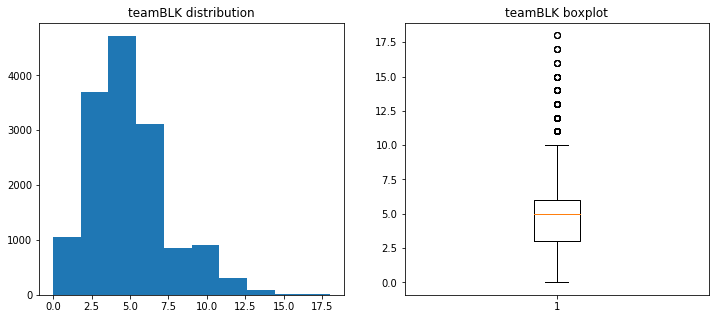

In [58]:
box_hist(team_df, 22)

Blocks, on the other hand look a little more skewed to the not occurring side (with some large potential outliers), but this will likely get smoothed as well.

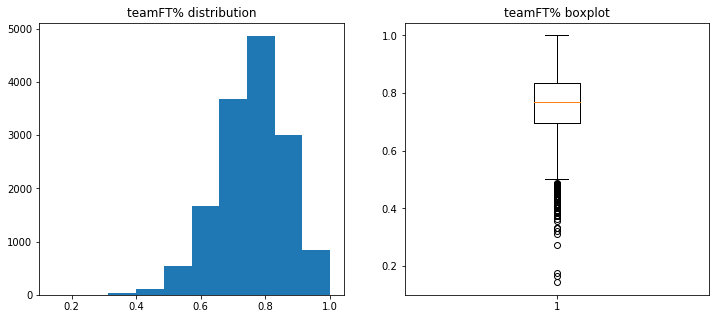

In [59]:
box_hist(team_df, 35)

Free throw percentage, contrary to blocks, tend to be higher rather than lower, with some very low outliers (likely smoothed out).

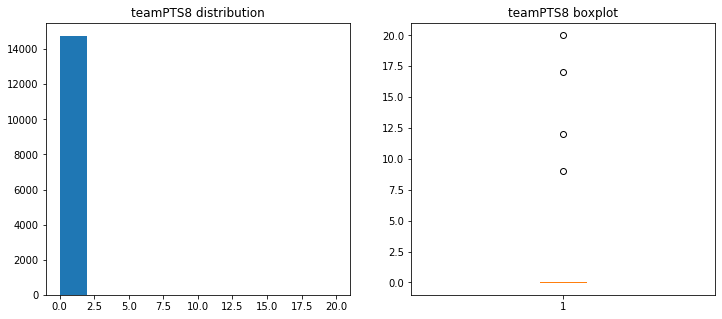

In [60]:
box_hist(team_df, 46)

We can see here that games that go to quadruple overtime are very rare! Based on the above there have only been 2 games (4 teams) since 2012 that went into quadruple overtime, it actually is quite similar with any overtime, they are relatively abnormal to see. Again this is probably best used as an indicator (similar to the teamMin variable).

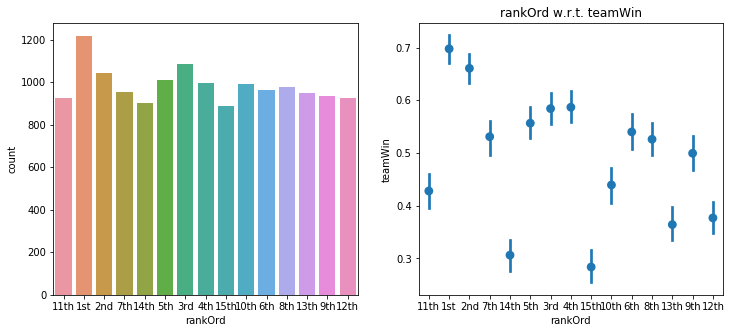

In [61]:
box_hist(team_df, 70)

To be expected, higher ranked teams have higher win percentages. It is interesting to see the relative distance between ranks, however.

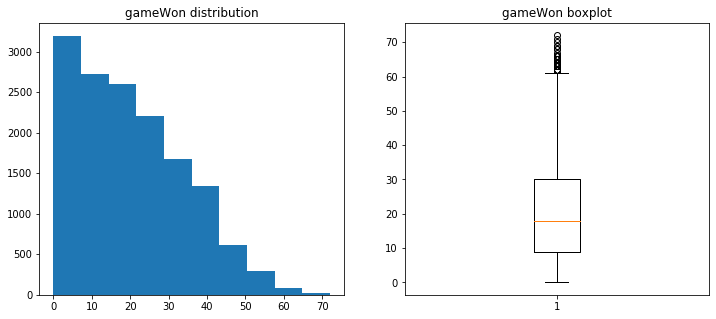

In [62]:
box_hist(team_df, 71)

This, on its own isn't very helpful, however it can be used in conjunction with other features to garner useful statistics.

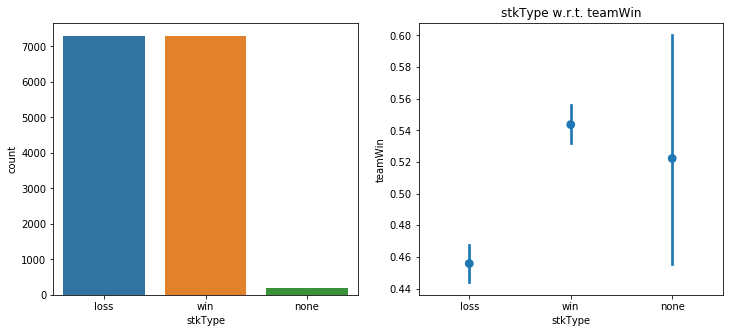

In [63]:
box_hist(team_df, 74)

Looks like if a team won its last game, it is more likely to win the one it is about to play, with the opposite also being true.

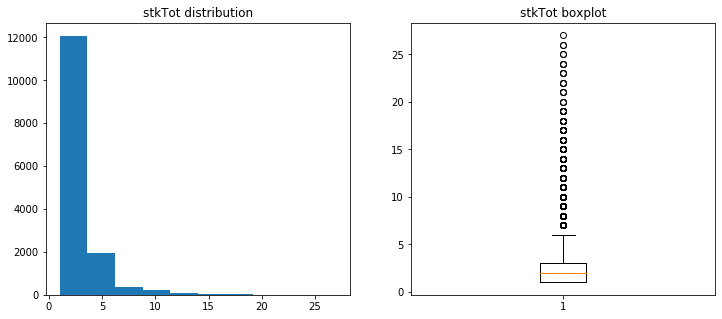

In [64]:
box_hist(team_df, 75)

Looks like there have been some huge streaks, but they may be abnormal if they get too large, may need to turn this categorical (W/L up to 5+).

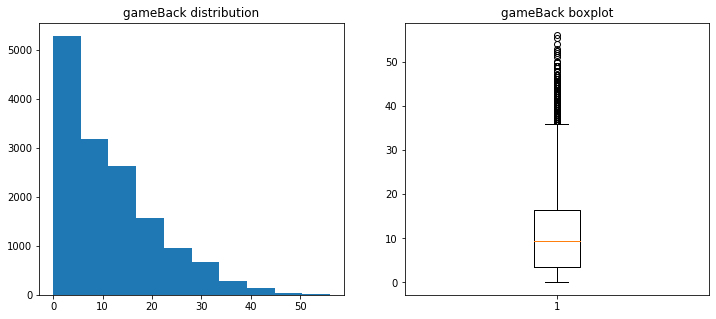

In [65]:
box_hist(team_df, 76)

This is likely very closely linked to the rank variable from earlier.

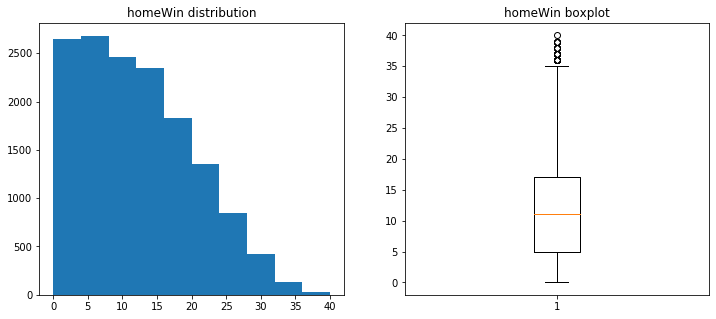

In [66]:
box_hist(team_df, 79)

It's possible we want to keep these outliers in this case, the reason being, these teams with immense amounts of home wins are probably extremely likely to win games at home (this could be used in conjunction with the teamHome variable in feature engineering).

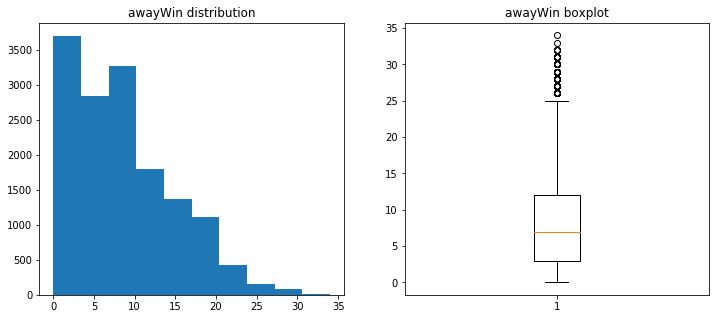

In [67]:
box_hist(team_df, 81)

Similar to the last, this could prove very useful.

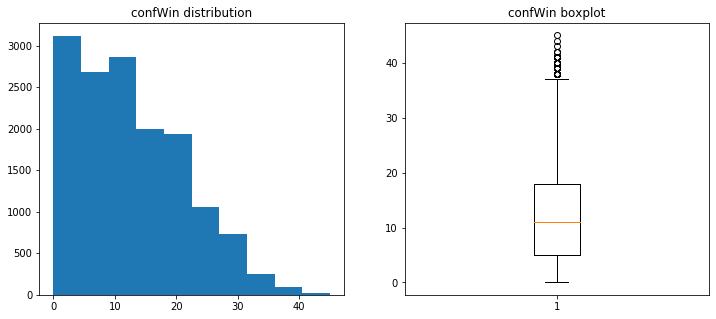

In [68]:
box_hist(team_df, 83)

This also could be useful in feature engineering (if a team generally beats those in its own conference it may be useful to know that information if they are playing a team in their conference - can likely create a variable that indicates the opposite as well).

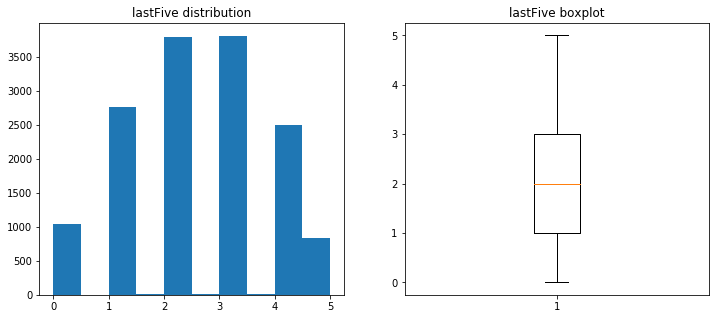

In [69]:
box_hist(team_df, 85)

This is really a category and perhaps should be treated as such (higher last five likely indicates a higher win chance).

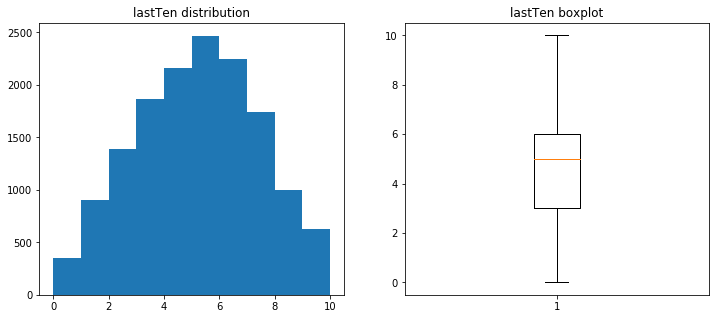

In [70]:
box_hist(team_df, 86)

Similarly to last five, last 10 could be used this way as well.

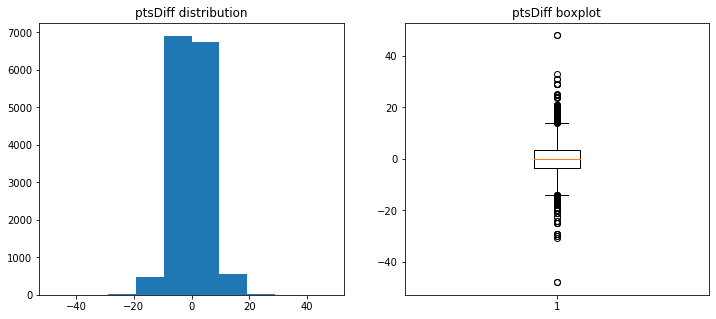

In [71]:
box_hist(team_df, 90)

This variable, based off the last two variables, have very low variability, but likely are a large indicator for a team's overall performance through the season.

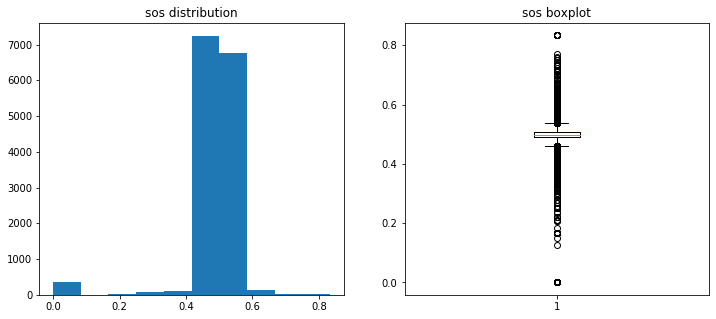

In [72]:
box_hist(team_df, 95)

I'm curious of those 0 strength values, may be of interest to look at those (certainly no team has zero strength schedule)?

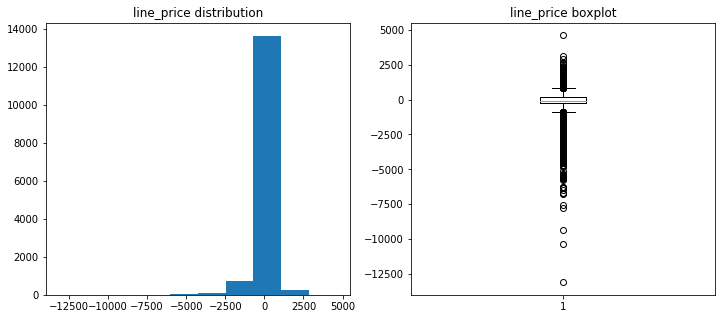

In [73]:
box_hist(team_df, 106)

This is another one with pretty extreme values, may need to wrangle these in a bit.

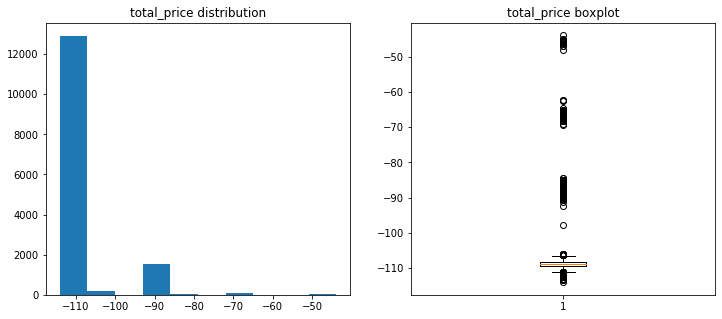

In [74]:
box_hist(team_df, 110)

This is a pretty wild looking data distribution. Certainly the oddest one I've run into (and it happens to be the last column)! Perhaps this should be converted into range groups?

# Feature Engineering

In [75]:
team_df['nonconfWin'] = team_df.gameWon - team_df.confWin
team_df['nonconfLoss'] = team_df.gameLost - team_df.confLoss

In [76]:
team_df['confW%'] = team_df.confWin / (team_df.confWin + team_df.confLoss)
team_df['nonconfW%'] = team_df.nonconfWin / (team_df.nonconfWin + team_df.nonconfLoss)

In [77]:
team_df['homeWin%'] = team_df.homeWin / (team_df.homeWin + team_df.homeLoss)
team_df['awayWin%'] = team_df.awayWin / (team_df.awayWin + team_df.awayLoss)

In [78]:
team_df['homeawayWin%'] = (team_df.teamHome * team_df['homeWin%']) + (((team_df.teamHome == 0).astype('int')) * team_df['awayWin%'])

In [79]:
team_df['ovrWin%'] = team_df.gameWon / team_df.gamePlay

In [80]:
team_df['teamDayOffCat'] = pd.cut(team_df.teamDayOff, bins=[0,1,2,3,4,12], labels=['0', '1', '2', '3', '4+'], right=False)

In [81]:
team_df['gmOTCat'] = pd.cut(team_df.teamMin, bins=[0,250,280,300,330,350], labels=['Reg', 'OT1', 'OT2', 'OT3', 'OT4'])

In [82]:
team_df['stkTotCat'] = pd.cut(team_df.stkTot, bins=[0,1,2,3,4,5,6,28], labels=['1','2','3','4','5','6','7+'])

In [83]:
team_df['stkCat'] = team_df.stk.str[0] + team_df.stkTotCat.astype('object')

In [84]:
team_df['stkTotAlt'] = team_df.stkType.apply(lambda x: 1 if x == 'win' else (-1 if x == 'loss' else 0)) * team_df.stkTot

In [85]:
team_df['lastFiveWin%'] = team_df.lastFive / 5
team_df['lastTenWin%'] = team_df.lastTen / 10

In [86]:
joined = team_df.join(team_df, lsuffix=('_A'), rsuffix=('_B'), how='outer').copy()

In [87]:
combo_df = joined[joined.teamNm_A != joined.teamNm_B].reset_index(drop=True).copy()

In [88]:
a_cols = combo_df.columns[combo_df.columns.str.endswith('_A')]
b_cols = combo_df.columns[combo_df.columns.str.endswith('_B')]

In [89]:
for a, b in zip(a_cols, b_cols):
    if is_numeric_dtype(combo_df[a]) == True:
        combo_df[a + 'B_Diff'] = combo_df[a] - combo_df[b]

In [90]:
team_comp = combo_df.drop(columns=b_cols).copy()

In [91]:
team_comp.columns = team_comp.columns.str.replace('_AB', '').str.replace('_A', '')
team_comp = team_comp.drop(columns=['gameID_Diff', 'seasID_Diff', 'first_game_Diff', 'teamMin_Diff', 'poss_Diff']).copy()

In [92]:
rolling_cols = ['teamWin'] + team_comp.columns[17:69].tolist() + team_comp.columns[126: 176].tolist()

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
rolling_df = team_comp[['gameID', 'seasID', 'gmDate', 'teamNm', 'first_game'] + rolling_cols].copy()

In [95]:
scaler = MinMaxScaler()

In [96]:
scaled_data = pd.DataFrame(scaler.fit_transform(rolling_df[rolling_cols]), columns=rolling_cols)

In [97]:
rolling_df = rolling_df.drop(columns=rolling_cols).join(scaled_data).copy()

In [98]:
total_diffs = []

for i in range(1, 10):
    total_team_diffs = []
    
    for team in rolling_df.teamNm.unique():
        team_seas_diffs_sqrts = []
        
        for seas in rolling_df[rolling_df.teamNm == team].seasID.unique():
            temp_team_df = rolling_df[(rolling_df.teamNm == team) & (rolling_df.seasID == seas)].sort_values('gmDate').copy()
            temp_rolling_df = temp_team_df[rolling_cols].rolling(i, 1, win_type='triang').mean().shift().iloc[1:].copy()
            one_team_seas_diffs_sqrt = (temp_team_df[rolling_cols].iloc[1:] - temp_rolling_df).abs().sum().sum()**(1/2)
            team_seas_diffs_sqrts.append(one_team_seas_diffs_sqrt)
            
        total_team_diffs.append(np.array(team_seas_diffs_sqrts).sum())
        
    total_diffs.append(np.array(total_team_diffs).sum())
    
min_diff, min_loc = np.array(total_diffs).min(), np.argmin(np.array(total_diffs))
min_k = min_loc + 1

dfs = []

for team in rolling_df.teamNm.unique():
    for seas in rolling_df[rolling_df.teamNm == team].seasID.unique():
        temp_team_df = rolling_df[(rolling_df.teamNm == team) & (rolling_df.seasID == seas)].sort_values('gmDate').copy()
        temp_rolling_df = temp_team_df[rolling_cols].rolling(min_k, 1, win_type='triang').mean().shift().copy()
        dfs.append(temp_rolling_df)
        
min_rolling_df = pd.concat(dfs).copy()
min_rolling_df = rolling_df.drop(columns=rolling_cols).join(min_rolling_df).copy()

In [99]:
min_k

9

Looks like the lowest sum of differences was on the k=9 dataframe, we now have our sliding window!

In [100]:
inverse_rolling_df = pd.DataFrame(scaler.inverse_transform(min_rolling_df[rolling_cols]), columns=rolling_cols)

In [101]:
inverse_rolling_df['teamWin%_last9'] = inverse_rolling_df.teamWin.copy()
inverse_rolling_df = inverse_rolling_df.drop(columns='teamWin')

In [102]:
rolling_cols.remove('teamWin')

In [103]:
team_comp_roll = team_comp.drop(columns=rolling_cols).join(inverse_rolling_df).copy()

In [104]:
team_comp_roll['sameConf'] = (team_comp_roll.teamConf_W_Diff == 0).astype('int').copy()

In [105]:
team_comp_roll = team_comp_roll.drop(columns=['teamWin_Diff', 'teamConf_W_Diff', 'teamHome_Diff']).copy()

In [106]:
team_comp_roll['confMatchupWin%'] = team_comp_roll.sameConf * team_comp_roll['confW%'] + (team_comp_roll.sameConf == 0) * team_comp_roll['nonconfW%']

In [107]:
identical_cols = ['gameID', 'seasID', 'gmDate', 'gmTime', 'first_game', 'offLNm1', 'offFNm1', 'offLNm2', 'offFNm2', 'offLNm3', 'offFNm3', 'gmOTCat']

In [108]:
vs_df = pd.merge(team_comp_roll, team_comp_roll, suffixes=['_A', '_B'], on=identical_cols).copy()

In [109]:
vs_df = vs_df[vs_df.teamNm_A != vs_df.teamNm_B].copy()

In [110]:
vs_df.shape

(14758, 448)

In [111]:
vs_df['confMatchupWin%Diff'] = vs_df['confMatchupWin%_A'] - vs_df['confMatchupWin%_B']

In [204]:
vs_rand_df = vs_df.sample(frac = 1.0).groupby('gameID').head(1).copy()

In [205]:
vs_rand_df.shape

(7379, 449)

In [206]:
vs_rand_df.shape[0]/vs_rand_df.shape[1]

16.434298440979955

In [207]:
vs_rand_df.teamWin_A.mean()

0.49789944436915573

In [208]:
a_cols = vs_rand_df.columns[vs_rand_df.columns.str.endswith('_A')]
b_cols = vs_rand_df.columns[vs_rand_df.columns.str.endswith('_B')]

In [209]:
for a, b in zip(a_cols, b_cols):
    if is_numeric_dtype(vs_rand_df[a]):
        ck_inverse = (vs_rand_df[a] == (vs_rand_df[b]*(-1))).mean()
    if ck_inverse == 1:
        vs_rand_df[a.replace('_A', '')] = vs_rand_df[a].copy()
        vs_rand_df.drop(columns=[a, b], inplace=True)

In [210]:
vs_rand_df.shape

(7379, 400)

In [211]:
a_cols = vs_rand_df.columns[vs_rand_df.columns.str.endswith('_A')]
b_cols = vs_rand_df.columns[vs_rand_df.columns.str.endswith('_B')]

In [212]:
vs_rand_df['sameConf'] = (vs_rand_df.teamConf_W_A == vs_rand_df.teamConf_W_B).astype('int')

In [213]:
vs_rand_df['confMatchupWin%_A'] = (vs_rand_df['confW%_A'] * vs_rand_df['sameConf']) + (vs_rand_df['nonconfW%_A'] * (vs_rand_df['sameConf'] == 0))
vs_rand_df['confMatchupWin%_B'] = (vs_rand_df['confW%_B'] * vs_rand_df['sameConf']) + (vs_rand_df['nonconfW%_B'] * (vs_rand_df['sameConf'] == 0))
vs_rand_df['confMatchupWin%Diff'] = vs_rand_df['confMatchupWin%_A'] - vs_rand_df['confMatchupWin%_B']

In [214]:
vs_rand_df.drop(columns=['teamWin_B', 'teamHome_B', 'sameConf_A', 'sameConf_B'], inplace=True)

In [215]:
vs_rand_df = vs_rand_df[vs_rand_df.first_game == 0].copy()

Check for high correlation for numerical variables.

## Multicollinearity

In [217]:
num_cols = vs_rand_df.select_dtypes(include=np.number).columns

In [252]:
X = vs_rand_df[num_cols].copy()

In [253]:
null_cols = X.columns[X.isna().any()].tolist()

In [306]:
def get_correlated_cols(df, target_col, thresh=.75):
    num_cols = df.select_dtypes(include=np.number).columns
    X = df[num_cols].copy() #numeric columns only!
    
    drop_cols = []
    inspect_cols = []
    for col in X.loc[:, X.columns != target_col].columns:

        high_corr_col = []

        for col2 in X.loc[:, X.columns != target_col].columns.drop(col):
            corr = X[col].corr(X[col2])
            if corr > thresh:
                high_corr_col.append(col2)

        if len(high_corr_col) > 0:

            cols_corrs = {col:abs(X.teamWin_A.corr(X[col]))}
            for colx in high_corr_col:
                cols_corrs[colx] = abs(X.teamWin_A.corr(X[colx]))

            max_corr = max(cols_corrs.items(), key=lambda x: x[1])
            drops = []
            inspects = []
            for key, value in cols_corrs.items():
                if value != max_corr[1]:
                    drops.append(key)
                elif value == max_corr[1]:
                    inspects.append(key)

            for item in drops:
                if item not in drop_cols:
                    drop_cols.append(item)

            if len(inspects) > 1:
                for item in inspects:
                    if (item not in inspect_cols) and (item not in drop_cols):
                        inspect_cols.append(item)

    for col in inspect_cols:
        if col in drop_cols:
            inspect_cols.remove(col)
    
    return drop_cols, inspect_cols

In [307]:
drop_cols, inspect_cols = get_correlated_cols(X, 'teamWin_A')

In [312]:
len(drop_cols)

234

There are a lot of highly correlated columns here, in this case, we keep the columns more correlated with the outcome variable while dropping those that are less correlated.

In [314]:
X = X.drop(columns=drop_cols).copy()

In [315]:
for col in null_cols:
    if col in X.columns:
        print(col)

homeawayWin%_B


In [322]:
X = X.drop(columns=['homeawayWin%_B']).copy()

In [324]:
target = X.teamWin_A

In [327]:
num_features = X.loc[:, X.columns != 'teamWin_A']

Go through categorical features next, use Chi-square to compare!